# Name: Chandhini Bayina 
# Home Assignment 1: Linear Regression from Scratch: Normal Equation vs Gradient Descent

This notebook implements linear regression on a synthetic dataset using **two approaches**:

1. **Closed-form (Normal Equation)**  
2. **Gradient Descent (from scratch)**

You will see:
- Raw data scatter plot
- Fitted line from the Normal Equation
- Fitted line from Gradient Descent
- Loss (MSE) vs iterations plot for Gradient Descent
- A brief comparison and metrics (MSE and $R^2$)

**Note**: Only `numpy` and `matplotlib` are used. No `scikit-learn`.


## 1) Imports & Reproducibility
We keep dependencies minimal. If you don't have these, install with:

```bash
pip install numpy matplotlib
```


In [1]:
! pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# for reproducibility
np.random.seed(42)


## 2) Generate Synthetic Dataset
We generate 200 samples with $x \sim \mathcal{U}[0,5]$ and 
$y = 3 + 4x + \epsilon$, where $\epsilon \sim \mathcal{N}(0, 1^2)$ (Gaussian noise).


In [3]:
m = 200  # number of samples
x = np.random.uniform(0.0, 5.0, size=(m, 1))  # shape (m, 1)
epsilon = np.random.normal(loc=0.0, scale=1.0, size=(m, 1))
y = 3.0 + 4.0 * x + epsilon  # true intercept=3, slope=4

print(f"x shape: {x.shape}, y shape: {y.shape}")


x shape: (200, 1), y shape: (200, 1)


### Add Bias (Intercept) Column to X
We build the design matrix $X$ as `[1, x]` so the parameter vector is $\theta = [b, w]^T$.


In [4]:
ones = np.ones((m, 1))
X = np.concatenate([ones, x], axis=1)  # shape (m, 2)
print("Design matrix X shape:", X.shape)


Design matrix X shape: (200, 2)


## 3) Closed-form Solution (Normal Equation)
We compute $\theta = (X^T X)^{-1} X^T y$ using only `numpy` operations (`np.dot`).


In [5]:
# Normal Equation using np.dot for matrix multiplication
XtX = np.dot(X.T, X)                    # X^T X
XtX_inv = np.linalg.inv(XtX)            # (X^T X)^{-1}
Xt_y = np.dot(X.T, y)                   # X^T y
theta_ne = np.dot(XtX_inv, Xt_y)        # theta

b_ne, w_ne = float(theta_ne[0, 0]), float(theta_ne[1, 0])
print(f"[Normal Eq] Intercept (b): {b_ne:.4f}, Slope (w): {w_ne:.4f}")


[Normal Eq] Intercept (b): 3.1052, Slope (w): 3.9844


## 4) Helper Functions: MSE, $R^2$, and Gradient of MSE
We use the MSE loss and its gradient with respect to $\theta$ for gradient descent:

$$J(\theta) = \frac{1}{m}\lVert X\theta - y \rVert^2$$
$$\nabla J(\theta) = \frac{2}{m} X^T (X\theta - y)$$


In [6]:
def predict(X, theta):
    """Return predictions for design matrix X and parameter vector theta."""
    return np.dot(X, theta)

def mse(X, y, theta):
    """Mean Squared Error using np.dot throughout."""
    residuals = predict(X, theta) - y
    return float(np.dot(residuals.T, residuals) / X.shape[0])

def r2_score(X, y, theta):
    """Coefficient of determination R^2."""
    y_hat = predict(X, theta)
    ss_res = float(np.dot((y - y_hat).T, (y - y_hat)))
    y_mean = np.mean(y)
    ss_tot = float(np.dot((y - y_mean).T, (y - y_mean)))
    return 1.0 - ss_res / ss_tot

def grad_mse(X, y, theta):
    """Gradient of the MSE: (2/m) * X^T (X theta - y)."""
    m = X.shape[0]
    return (2.0 / m) * np.dot(X.T, (np.dot(X, theta) - y))


## 5) Gradient Descent Implementation (from scratch)
- Initialize $\theta = [0, 0]^T$  
- Learning rate $\eta = 0.05$  
- Run for 1000 iterations  
We track the MSE at every iteration to visualize convergence.


In [7]:
def gradient_descent(X, y, lr=0.05, num_iters=1000):
    theta = np.zeros((X.shape[1], 1))  # [b, w]^T
    losses = []
    for i in range(num_iters):
        # Compute gradient using only np.dot
        g = grad_mse(X, y, theta)
        # Parameter update
        theta = theta - lr * g
        # Track current MSE
        losses.append(mse(X, y, theta))
    return theta, np.array(losses)

theta_gd, losses = gradient_descent(X, y, lr=0.05, num_iters=1000)
b_gd, w_gd = float(theta_gd[0, 0]), float(theta_gd[1, 0])
print(f"[Grad Descent] Intercept (b): {b_gd:.4f}, Slope (w): {w_gd:.4f}")


[Grad Descent] Intercept (b): 3.1052, Slope (w): 3.9844


/var/folders/h_/_bjpnb894kgf18frynwf6bww0000gn/T/ipykernel_4555/1646743294.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(residuals.T, residuals) / X.shape[0])


## 6) Metrics & Comparison
We compute MSE and $R^2$ for both methods and provide a short commentary.


In [8]:
mse_ne = mse(X, y, theta_ne)
mse_gd = mse(X, y, theta_gd)
r2_ne = r2_score(X, y, theta_ne)
r2_gd = r2_score(X, y, theta_gd)

print("Metrics (lower MSE and higher R^2 are better):")
print(f"  Normal Eq -> MSE: {mse_ne:.6f}, R^2: {r2_ne:.6f}")
print(f"  GradDesc   -> MSE: {mse_gd:.6f}, R^2: {r2_gd:.6f}")

print("\nComment:")
print("Both methods should converge to very similar parameters and metrics.\n"
      "Small differences arise because gradient descent is iterative and may\n"
      "stop with a tiny optimization error depending on learning rate and iterations.")


Metrics (lower MSE and higher R^2 are better):
  Normal Eq -> MSE: 0.933826, R^2: 0.973527
  GradDesc   -> MSE: 0.933826, R^2: 0.973527

Comment:
Both methods should converge to very similar parameters and metrics.
Small differences arise because gradient descent is iterative and may
stop with a tiny optimization error depending on learning rate and iterations.


/var/folders/h_/_bjpnb894kgf18frynwf6bww0000gn/T/ipykernel_4555/1646743294.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(residuals.T, residuals) / X.shape[0])
/var/folders/h_/_bjpnb894kgf18frynwf6bww0000gn/T/ipykernel_4555/1646743294.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ss_res = float(np.dot((y - y_hat).T, (y - y_hat)))
/var/folders/h_/_bjpnb894kgf18frynwf6bww0000gn/T/ipykernel_4555/1646743294.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Dep

## 7) Plots
We produce:
1. **Data + Fitted Lines** (Normal Equation and Gradient Descent)
2. **Loss (MSE) vs Iterations** for Gradient Descent


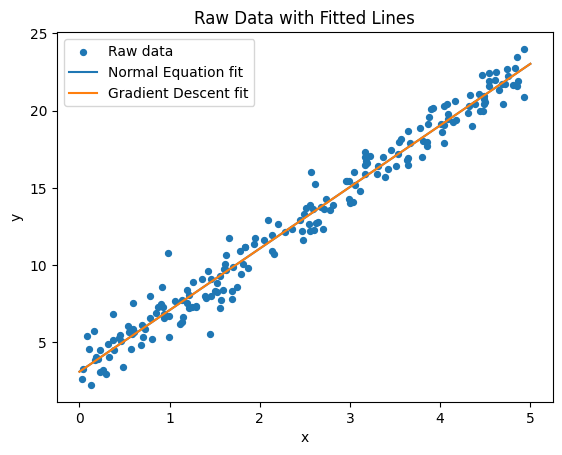

In [9]:
# 7.1 Raw data and fitted lines
plt.figure()
plt.scatter(x, y, s=18, label='Raw data')

# Build x-axis for line plotting (sorted for a clean line)
x_line = np.linspace(0, 5, 200).reshape(-1, 1)
X_line = np.concatenate([np.ones_like(x_line), x_line], axis=1)
y_ne_line = predict(X_line, theta_ne)
y_gd_line = predict(X_line, theta_gd)

plt.plot(x_line, y_ne_line, label='Normal Equation fit')
plt.plot(x_line, y_gd_line, label='Gradient Descent fit')
plt.title('Raw Data with Fitted Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


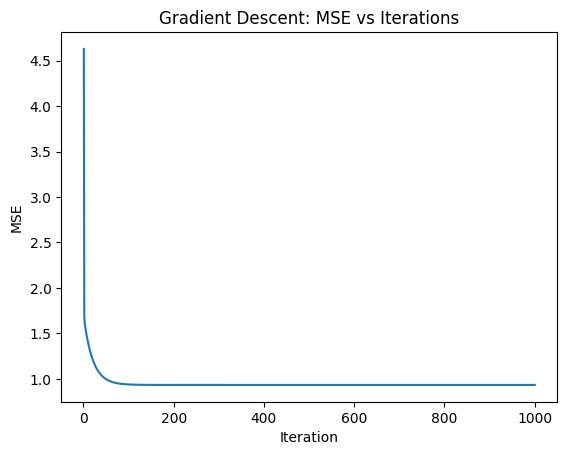

In [10]:
# 7.2 Loss curve (MSE vs iterations) for Gradient Descent
plt.figure()
plt.plot(np.arange(1, losses.shape[0] + 1), losses)
plt.title('Gradient Descent: MSE vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()


## 8) Final Notes
- Normal Equation gives the **exact** solution (assuming $(X^TX)$ is invertible).  
- Gradient Descent converges to the same solution under a good learning rate and enough iterations.  
- For very large feature spaces, the Normal Equation is expensive due to the matrix inverse, while Gradient Descent scales better.
